<a href="https://colab.research.google.com/github/Viru12345/AI-Lab/blob/main/Making_the_Most_of_your_Colab_Subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making the Most of your Colab Subscription



## Faster GPUs

Users who have purchased one of Colab's paid plans have access to faster GPUs and more memory. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to select from several accelerator options, subject to availability.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator to the desired option.

## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available. More powerful GPUs are always offered with high-memory VMs.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape toggle button. After, re-execute the code cell.


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). Colab Pro and Pro+ users have access to longer runtimes than those who use Colab free of charge.

## Background execution

Colab Pro+ users have access to background execution, where notebooks will continue executing even after you've closed a browser tab. This is always enabled in Pro+ runtimes as long as you have compute units available.



## Relaxing resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab, avoid using resources when you don't need them. For example, only use a GPU when required and close Colab tabs when finished.



If you encounter limitations, you can relax those limitations by purchasing more compute units via Pay As You Go. Anyone can purchase compute units via [Pay As You Go](https://colab.research.google.com/signup); no subscription is required.

## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+.

If you encounter errors or other issues with billing (payments) for Colab Pro, Pro+, or Pay As You Go, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colab makes possible, check out these tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error as mae
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('boxoffice_combined_10000_plus.csv',
                 encoding='latin-1')
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491.0,1.274886e+09,Warner Bros.,163620146.0,253,174687337,R,Animation,16
1,Titanic,169411543.0,1.132871e+09,Disney,85549990.0,122,103948486,G,Action,103
2,Jurassic Park,107836098.0,5.833298e+08,Sony,55681429.0,3826,122104991,NC-17,Horror,89
3,Avatar,51433697.0,1.225323e+09,Disney,109775324.0,3868,46431596,G,Horror,85
4,The Lion King,142791649.0,6.041407e+08,Warner Bros.,59476800.0,2934,203513696,R,Comedy,158


In [4]:
df.shape

(10839, 10)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10839 entries, 0 to 10838
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             10839 non-null  object 
 1   domestic_revenue  10839 non-null  float64
 2   world_revenue     10839 non-null  float64
 3   distributor       10839 non-null  object 
 4   opening_revenue   10839 non-null  float64
 5   opening_theaters  10839 non-null  int64  
 6   budget            10839 non-null  int64  
 7   MPAA              10839 non-null  object 
 8   genres            10839 non-null  object 
 9   release_days      10839 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 846.9+ KB


In [6]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
domestic_revenue,10839.0,9.923897e+07,1.523486e+08,2.357000e+03,1.543018e+07,4.465500e+07,1.363005e+08,2.799439e+09
world_revenue,10839.0,2.725840e+08,3.856624e+08,1.846850e+06,4.343674e+07,7.866792e+07,3.126631e+08,2.837841e+09
opening_revenue,10839.0,4.005905e+07,5.796374e+07,8.414063e+02,3.577391e+06,1.202565e+07,5.385406e+07,7.574645e+08
opening_theaters,10839.0,2.442235e+03,9.987868e+02,1.000000e+01,1.629500e+03,2.456000e+03,3.286000e+03,4.499000e+03
budget,10839.0,1.171587e+08,6.729966e+07,5.197977e+06,6.102396e+07,1.128883e+08,1.661250e+08,2.998597e+08
release_days,10839.0,1.082717e+02,5.060022e+01,1.000000e+00,6.500000e+01,1.080000e+02,1.510000e+02,1.990000e+02


In [7]:
# We will be predicting only
# domestic_revenue in this article.

to_remove = ['world_revenue', 'opening_revenue']
df.drop(to_remove, axis=1, inplace=True)

In [8]:
df.isnull().sum() * 100 / df.shape[0]

,0
title,0.0
domestic_revenue,0.0
distributor,0.0
opening_theaters,0.0
budget,0.0
MPAA,0.0
genres,0.0
release_days,0.0


In [9]:
# Handling the null value columns
df.drop('budget', axis=1, inplace=True)

for col in ['MPAA', 'genres']:
    df[col] = df[col].fillna(df[col].mode()[0])

df.dropna(inplace=True)

df.isnull().sum().sum()

np.int64(0)

In [10]:
df['domestic_revenue'] = df['domestic_revenue'].astype(str).str[1:]

for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    df[col] = df[col].astype(str).str.replace(',', '')

    # Selecting rows with no null values
    # in the columns on which we are iterating.
    temp = (~df[col].isnull())
    df[temp][col] = df[temp][col].convert_dtypes(float)

    df[col] = pd.to_numeric(df[col], errors='coerce')

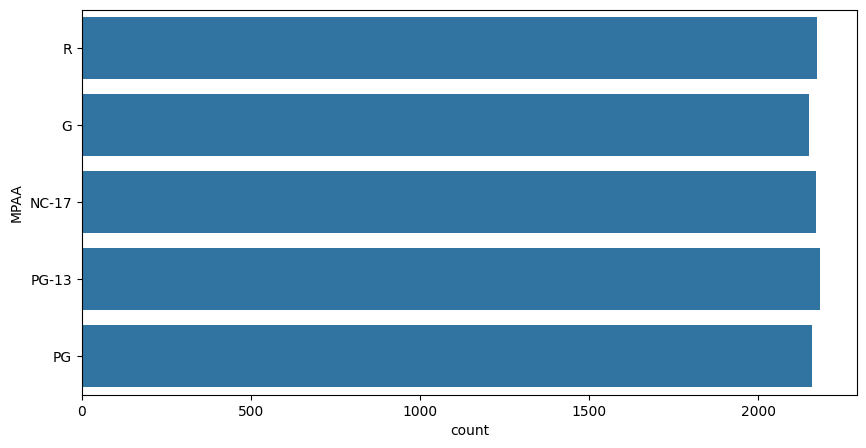

In [11]:
plt.figure(figsize=(10, 5))
sb.countplot(df['MPAA'])
plt.show()


In [12]:
df.groupby('MPAA')['domestic_revenue'].mean()


,domestic_revenue
MPAA,
G,1.850832e+07
NC-17,1.897964e+07
PG,1.805809e+07
PG-13,1.783283e+07
R,1.782424e+07


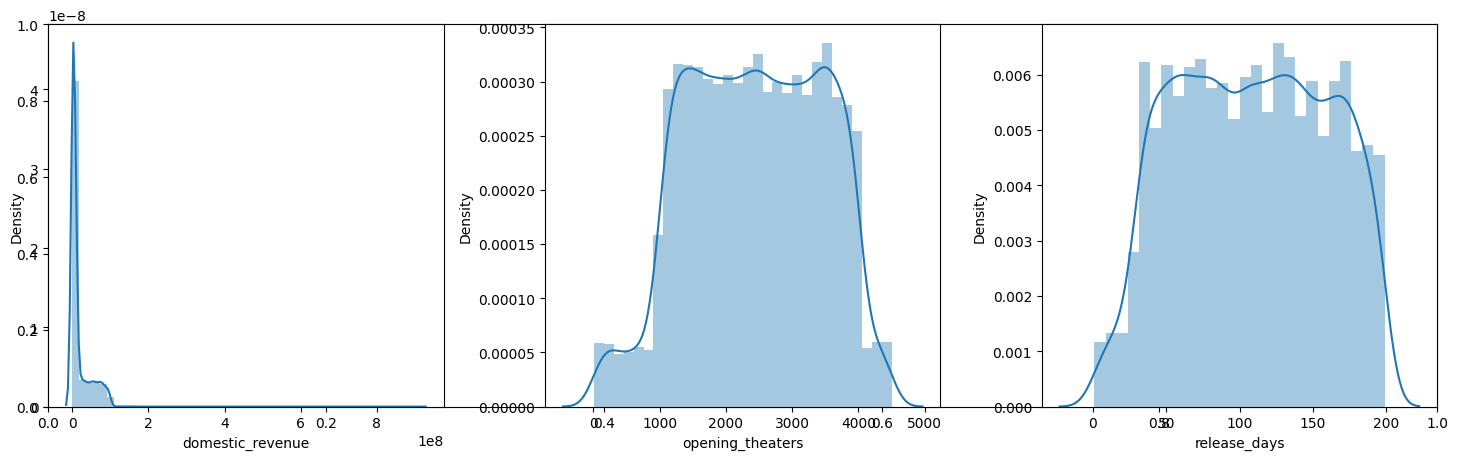

In [13]:
plt.subplots(figsize=(15, 5))

features = ['domestic_revenue', 'opening_theaters', 'release_days']
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

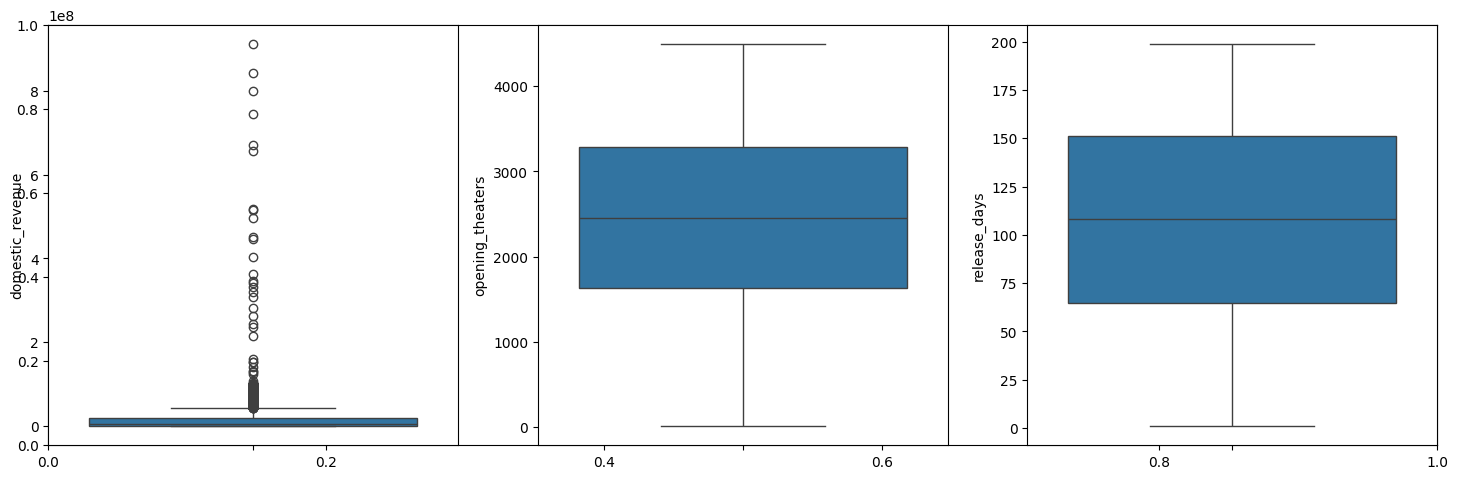

In [14]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [15]:
for col in features:
  df[col] = df[col].apply(lambda x: np.log10(x))

In [16]:
vectorizer = CountVectorizer()
vectorizer.fit(df['genres'])
features = vectorizer.transform(df['genres']).toarray()

genres = vectorizer.get_feature_names_out()
for i, name in enumerate(genres):
    df[name] = features[:, i]

df.drop('genres', axis=1, inplace=True)

In [17]:
removed = 0
# Check if 'action' and 'western' columns exist before slicing
if 'action' in df.columns and 'western' in df.columns:
    for col in df.loc[:, 'action':'western'].columns:

        # Removing columns having more
        # than 95% of the values as zero.
        if (df[col] == 0).mean() > 0.95:
            removed += 1
            df.drop(col, axis=1, inplace=True)

print(removed)
print(df.shape)


0
(10839, 13)


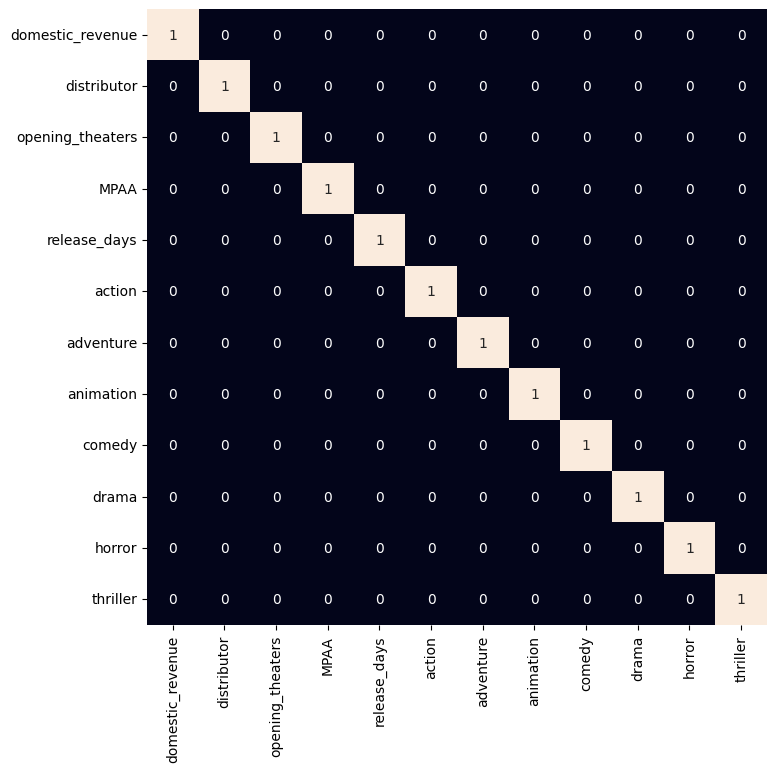

In [18]:
for col in ['distributor', 'MPAA']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
plt.figure(figsize=(8, 8))
sb.heatmap(df.select_dtypes(include=np.number).corr() > 0.8,
            annot=True,
            cbar=False)
plt.show()

In [19]:
features = df.drop(['title', 'domestic_revenue'], axis=1)
target = df['domestic_revenue'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                    test_size=0.1,
                                    random_state=22)
X_train.shape, X_val.shape


((9755, 11), (1084, 11))

In [20]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [21]:
df = df[df['domestic_revenue'] > 0]         # remove 0 or negative
df = df[df['opening_theaters'] > 0]
df = df[df['release_days'] > 0]
df.dropna(inplace=True)                     # remove any leftover NaNs

# Safe log10 transform
for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    df[col] = np.log10(df[col] + 1)

In [22]:
if 'genres' in df.columns:
    vectorizer = CountVectorizer()
    genre_matrix = vectorizer.fit_transform(df['genres']).toarray()
    genre_df = pd.DataFrame(genre_matrix, columns=vectorizer.get_feature_names_out())
    df = pd.concat([df.drop('genres', axis=1), genre_df], axis=1)



In [23]:
# Re-check after log transform
df = df.replace([np.inf, -np.inf], np.nan)  # Replace infs with NaN
df.dropna(subset=['domestic_revenue'], inplace=True)  # Remove bad targets


In [24]:
print(df['domestic_revenue'].isna().sum())
print(np.isinf(df['domestic_revenue']).sum())


0
0


In [26]:
# 1️⃣ Replace infinite values with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# 2️⃣ Drop rows where target (domestic_revenue) is still NaN or inf
df.dropna(subset=['domestic_revenue'], inplace=True)

# 3️⃣ Confirm the target is clean
print("Is any target inf?", np.isinf(df['domestic_revenue']).sum())
print("Is any target NaN?", df['domestic_revenue'].isna().sum())


Is any target inf? 0
Is any target NaN? 0


In [28]:
X = df.drop(['domestic_revenue'], axis=1)
y = df['domestic_revenue'].values


In [29]:
# Clean before splitting
import numpy as np

# Step 1: Remove negative or zero values for log-safe columns
df = df[(df['domestic_revenue'] > 0) & (df['opening_theaters'] > 0) & (df['release_days'] > 0)]

# Step 2: Apply safe log transform
for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    df[col] = np.log10(df[col] + 1)

# Step 3: Drop rows where log created inf or NaN
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)

# Step 4: Final check — make sure y has no inf or NaN
print("Inf in y:", np.isinf(df['domestic_revenue']).sum())
print("NaN in y:", df['domestic_revenue'].isna().sum())


Inf in y: 0
NaN in y: 0


In [30]:
from sklearn.preprocessing import LabelEncoder

# Identify object (string) columns
string_cols = df.select_dtypes(include='object').columns.tolist()
print("🧪 String columns before model training:", string_cols)

# Apply Label Encoding to each
for col in string_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


🧪 String columns before model training: ['title']


In [31]:
# Now split again safely
X = df.drop(['domestic_revenue'], axis=1)
y = df['domestic_revenue'].values

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.1, random_state=22)

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)


LinearRegression()

In [35]:
from xgboost import XGBRegressor

# Initialize
xgb_model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)

# Train
xgb_model.fit(X_train, Y_train)

# Confirm it's trained
print("✅ Model Trained:", xgb_model)

# Predict
val_preds_xgb = xgb_model.predict(X_val)


✅ Model Trained: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("📊 XGBoost Validation Performance:")
print("MAE :", mean_absolute_error(Y_val, val_preds_xgb))
print("RMSE:", np.sqrt(mean_squared_error(Y_val, val_preds_xgb)))
print("R²  :", r2_score(Y_val, val_preds_xgb))

📊 XGBoost Validation Performance:
MAE : 0.009263782595104538
RMSE: 0.012219095381248008
R²  : 0.0730111186986343


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Training predictions
train_preds_xgb = xgb_model.predict(X_train)
val_preds_xgb = xgb_model.predict(X_val)

# Training metrics
print("📊 XGBoost Training Metrics:")
print("MAE :", mean_absolute_error(Y_train, train_preds_xgb))
print("RMSE:", np.sqrt(mean_squared_error(Y_train, train_preds_xgb)))
print("R²  :", r2_score(Y_train, train_preds_xgb))

# Validation metrics
print("\n📊 XGBoost Validation Metrics:")
print("MAE :", mean_absolute_error(Y_val, val_preds_xgb))
print("RMSE:", np.sqrt(mean_squared_error(Y_val, val_preds_xgb)))
print("R²  :", r2_score(Y_val, val_preds_xgb))

📊 XGBoost Training Metrics:
MAE : 0.008683092978562963
RMSE: 0.011458751478257916
R²  : 0.16400290421868768

📊 XGBoost Validation Metrics:
MAE : 0.009263782595104538
RMSE: 0.012219095381248008
R²  : 0.0730111186986343


In [38]:
def regression_accuracy(y_true, y_pred, tolerance=0.10):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    relative_error = np.abs(y_true - y_pred) / y_true
    accurate = relative_error <= tolerance
    return np.mean(accurate) * 100

# Custom "accuracy" within 10% error margin
train_acc = regression_accuracy(Y_train, train_preds_xgb)
val_acc = regression_accuracy(Y_val, val_preds_xgb)

print("\n✅ Custom Accuracy (within ±10%):")
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Validation Accuracy: {val_acc:.2f}%")


✅ Custom Accuracy (within ±10%):
Training Accuracy: 96.49%
Validation Accuracy: 95.66%


In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)



RandomForestRegressor(random_state=42)

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, Y_train)


GradientBoostingRegressor(random_state=42)

In [41]:
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(estimators=[
    ('lr', lr_model),     # ✅ use your already trained lr_model
    ('xgb', xgb_model),   # ✅ already trained
    ('rf', rf_model),     # define if not done yet
    ('gbr', gbr_model)    # define if not done yet
])
voting_model.fit(X_train, Y_train)



VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_cons...
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=4,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...)),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('gbr',
                             GradientBoostingRegressor(random_state=42))])

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, model, X_val, Y_val):
    preds = model.predict(X_val)
    mae = mean_absolute_error(Y_val, preds)
    rmse = np.sqrt(mean_squared_error(Y_val, preds))
    r2 = r2_score(Y_val, preds)

    print(f"\n📊 {name} Performance:")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}")

# Evaluate all models
evaluate_model("Linear Regression", lr_model, X_val, Y_val)
evaluate_model("XGBoost Regressor", xgb_model, X_val, Y_val)
evaluate_model("Random Forest Regressor", rf_model, X_val, Y_val)
evaluate_model("Gradient Boosting Regressor", gbr_model, X_val, Y_val)
evaluate_model("Voting Regressor (Ensemble)", voting_model, X_val, Y_val)



📊 Linear Regression Performance:
MAE  : 0.01
RMSE : 0.01
R²   : 0.0103

📊 XGBoost Regressor Performance:
MAE  : 0.01
RMSE : 0.01
R²   : 0.0730

📊 Random Forest Regressor Performance:
MAE  : 0.01
RMSE : 0.01
R²   : 0.0193

📊 Gradient Boosting Regressor Performance:
MAE  : 0.01
RMSE : 0.01
R²   : 0.0737

📊 Voting Regressor (Ensemble) Performance:
MAE  : 0.01
RMSE : 0.01
R²   : 0.0698


In [43]:
from google.colab import files
uploaded = files.upload()


Saving boxoffice_combined_10000_plus.csv to boxoffice_combined_10000_plus (1).csv
